In [1]:
from fastai.imports import*
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [3]:
dataset = pd.read_csv("DatasetCompletoDiario.csv",sep=";");
dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


dataset= dataset.sort_values(['Data'])
dataset.head(10)

,Data,PrecoDolar,QtdVendas,VolVarejo,FaturamentoIndust,IndsBebida,IndsMaquina,IndsMetal,IndsTextil,IndsTransf,IndsAlimen
0,2014-01-08,2.3773,28,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
1,2014-01-09,2.3954,0,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
2,2014-01-10,2.3813,10,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
3,2014-01-13,2.3485,49,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
4,2014-01-14,2.3611,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
5,2014-01-15,2.3465,27,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
6,2014-01-16,2.3677,1,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
7,2014-01-17,2.3595,15,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
8,2014-01-20,2.3329,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6
9,2014-01-21,2.3602,21,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6


In [4]:
#dataset = dataset.dropna(how='all')
dataset['QtdVendas'] = dataset['QtdVendas'].replace([np.inf, -np.inf], np.nan)
dataset=dataset.dropna()
#dataset['QtdVendas'] = dataset['QtdVendas'].dropna()

In [5]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['VolVarejo'].reset_index(drop=True, inplace=True)
dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
dataset['IndsBebida'].reset_index(drop=True, inplace=True)
dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
dataset['IndsMetal'].reset_index(drop=True, inplace=True)
dataset['IndsTextil'].reset_index(drop=True, inplace=True)
dataset['IndsTransf'].reset_index(drop=True, inplace=True)
dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = dataset['PrecoDolar'].values
df['QtdVendas'] = dataset['QtdVendas'].values
df['VolVarejo'] = dataset['VolVarejo'].values
df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['IndsBebida'] = dataset['IndsBebida'].values
df['IndsMaquina'] = dataset['IndsMaquina'].values
df['IndsMetal'] = dataset['IndsMetal'].values
df['IndsTextil'] = dataset['IndsTextil'].values
df['IndsTransf'] = dataset['IndsTransf'].values
df['IndsAlimen'] = dataset['IndsAlimen'].values


In [6]:
df_semVenda, y, nas = proc_df(df,'QtdVendas')

In [7]:
#FUNÇÃO REPARTIR O DATASET EM TRAIN E TEST
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid =  261                          #(20% do dataset para validação)
n_trn = len(df_semVenda)-n_valid
raw_train, raw_valid = split_vals(df,n_trn)
train_features, test_features = split_vals(df_semVenda, n_trn)   ### train_features, test_features  (features= var independente)
train_labels, test_labels = split_vals(y, n_trn)             ### labels= variavel DEPENDENTE(TARGET)

train_features.shape, test_labels.shape, test_features.shape

((1044, 9), (261,), (261, 9))

In [8]:
m=RandomForestRegressor(n_estimators = 10, random_state = 42)
m.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

# ----------------------------------------------

### Random Search

In [10]:
##################   HYPERPARAMETRO QUE SERÃO TESTADOS
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 100,dtype=int)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 20, dtype=int)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391, 412, 432, 452, 472, 492, 512, 532, 552, 572, 592, 613, 633, 653, 673, 693, 713, 733, 753, 773, 793, 814, 834, 854, 874, 894, 914, 934, 954, 974, 994, 1015, 1035, 1055, 1075, 1095, 1115, 1135, 1155, 1175, 1195, 1216, 1236, 1256, 1276, 1296, 1316, 1336, 1356, 1376, 1396, 1417, 1437, 1457, 1477, 1497, 1517, 1537, 1557, 1577, 1597, 1618, 1638, 1658, 1678, 1698, 1718, 1738, 1758, 1778, 1798, 1819, 1839, 1859, 1879, 1899, 1919, 1939, 1959, 1979, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10, 20, 40], 'min_samples_leaf': [1, 2, 4, 8, 16], 'bootstrap': [True, False]}


In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 500 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)    #### fit(the training input samples, the target values)    target values = class labels in classification

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 28.5min finished
C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=500, n_jobs=-1,
          param_distributions={'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 211, 231, 251, 271, 291, 311, 331, 351, 371, 391, 412, 432, 452, 472, 492, 512, 532, 552, 572, 592, 613, 633, 653, 673, 693, 713, 733, 753, 773, 793, 814, 834, 854, 874, 894, 914, 934, 954, 974, 994, 1015, 1035, 1055,...amples_split': [2, 5, 10, 20, 40], 'min_samples_leaf': [1, 2, 4, 8, 16], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, re

In [12]:
rf_random.best_params_

{'n_estimators': 713,
 'min_samples_split': 10,
 'min_samples_leaf': 16,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': True}

In [14]:
randomGrid_model = RandomForestRegressor(random_state = 42,n_estimators = 713,min_samples_split=10,min_samples_leaf=16, max_features='sqrt',max_depth=120, bootstrap=True)
randomGrid_model.fit(train_features,train_labels)
predOtimizada = randomGrid_model.predict(test_features)

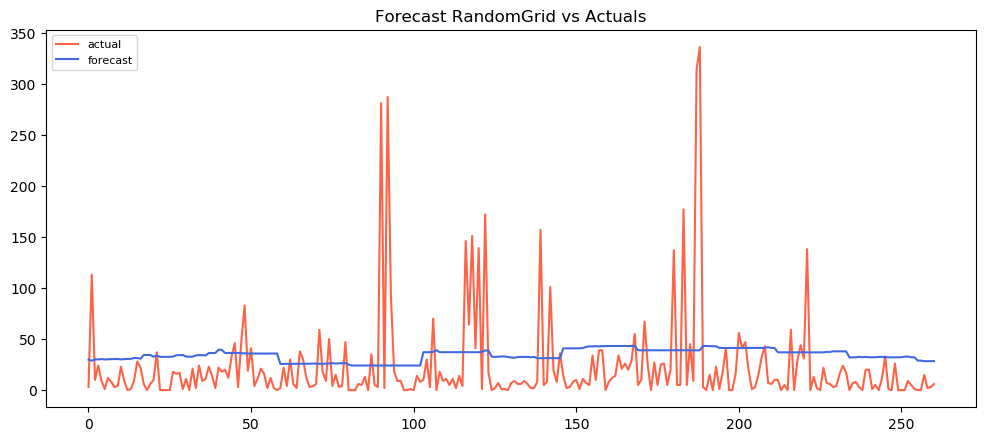

In [15]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual',color='tomato')
plt.plot(predOtimizada, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast RandomGrid vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [17]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    mae = np.mean(np.abs(predictions - test_labels))
    
    #accuracy = 100 - mape
    accuracy = 1 - mae
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [18]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 30.6496 degrees.
Accuracy = -29.65%.


### Grid Search with Cross Validation

In [9]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 50, 90, 120, 150, 200],
    'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [3, 4, 5, 6, 7, 9],
    'min_samples_split': [8, 10, 12, 14, 16],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700,800,900, 1000, 1100, 1500, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [10]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 18720 candidates, totalling 56160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

{'bootstrap': True,
 'max_depth': 150,
 'max_features': 2,
 'min_samples_leaf': 7,
 'min_samples_split': 12,
 'n_estimators': 100}

In [12]:
best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, test_features, test_labels)

In [8]:
GridSearch_model = RandomForestRegressor(n_estimators = 100,min_samples_split=12,min_samples_leaf=7, max_features=2,max_depth=150)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

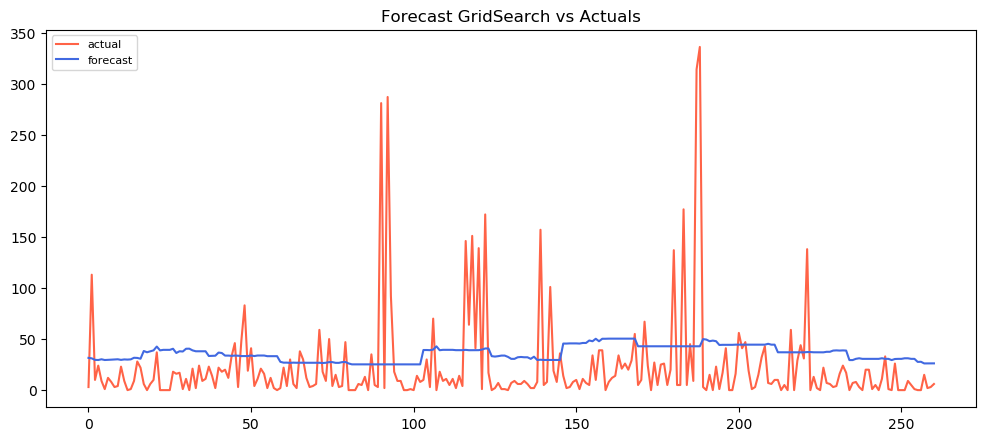

In [9]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [15]:
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


{'mape': inf,
 'me': 12.655101395539338,
 'mae': 32.06235102300594,
 'mpe': inf,
 'rmse': 47.888408918232635,
 'corr': 0.06004513146679797,
 'minmax': 0.6942803916820044}

In [17]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    mae = np.mean(np.abs(predictions - test_labels))
    #accuracy = 100 - mape
    accuracy = 1 - mae
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

random_accuracy = evaluate(predOtimizada2, test_features, test_labels)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

### Grid Search with Cross Validation 2 - aumentando a faixa

In [17]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [120, 130, 140, 150, 160, 170],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [6, 7, 8, 9, 10],
    'min_samples_split': [10, 11, 12, 13, 14],
    'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140,150, 160, 170]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [19]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 7800 candidates, totalling 23400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

{'bootstrap': True,
 'max_depth': 140,
 'max_features': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 13,
 'n_estimators': 50}

In [20]:
GridSearch_model = RandomForestRegressor(n_estimators = 50,min_samples_split=13,min_samples_leaf=10, max_features=2,max_depth=140)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

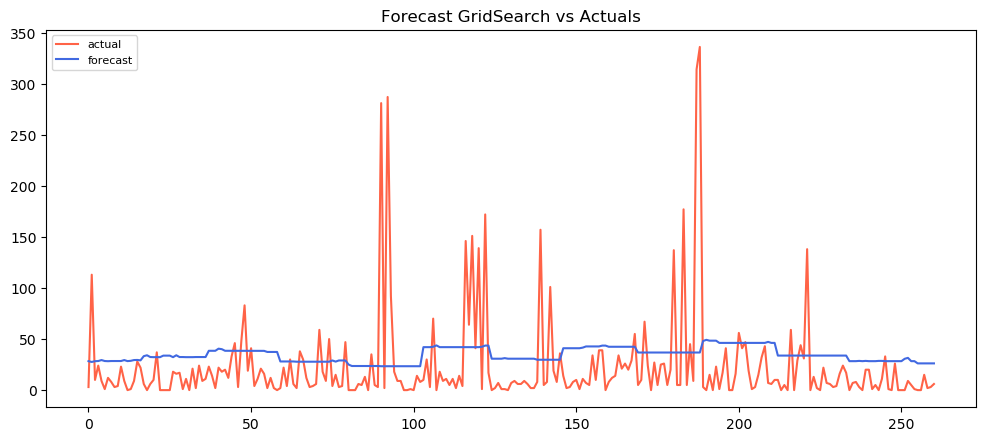

In [21]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [25]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 11.186220034124421,
 'mae': 30.7725419371109,
 'mpe': inf,
 'rmse': 47.52424086251259,
 'corr': 0.05353829894475911,
 'minmax': 0.6849702776309224}

In [24]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    mae = np.mean(np.abs(predictions - test_labels))
    #accuracy = 100 - mape
    accuracy = 1 - mae
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
best_grid = grid_search.best_estimator_
random_accuracy = evaluate(best_grid, test_features, test_labels)

NameError: name 'grid_search' is not defined

### Grid Search with Cross Validation 2 - aumentando a faixa

In [24]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [130,135,140,145,150],
    'max_features': [2, 4, 5],
    'min_samples_leaf': [6, 7, 8, 9, 10],
    'min_samples_split': [5,6,7,8,9,10],
    'n_estimators': [10,20,30,40,50,60,100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [25]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 3150 candidates, totalling 9450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1245 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1975 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 2865 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3919 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5133 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6511 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 8049 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 9443 out of 9450 | elapsed:  3.4min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 9450 out of 9450 | elapsed:  3.4min finished


{'bootstrap': True,
 'max_depth': 130,
 'max_features': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 9,
 'n_estimators': 10}

In [26]:
GridSearch_model = RandomForestRegressor(n_estimators = 10,min_samples_split=9,min_samples_leaf=8, max_features=4,max_depth=130)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

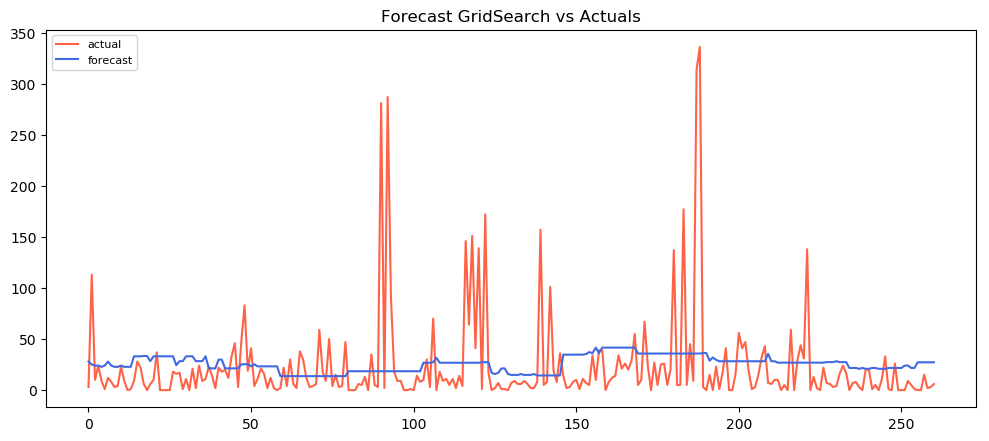

In [27]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 2.522131725499718,
 'mae': 25.807596839005967,
 'mpe': inf,
 'rmse': 46.20376160005398,
 'corr': 0.06968340368525344,
 'minmax': 0.6498236499100067}

In [31]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    mae = np.mean(np.abs(predictions - test_labels))
    #accuracy = 100 - mape
    accuracy = 1 - mae
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

random_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 32.1534 degrees.
Accuracy = -31.15%.


# Best model ate o momento

In [8]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100,110,120,130,135,140],
    'max_features': [2, 4, 5],
    'min_samples_leaf': [6, 7, 8, 9, 10],
    'min_samples_split': [5,6,7,8,9,10],
    'n_estimators': [1,2,3,4,5,6,7,8,9,10]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [32]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 3150 candidates, totalling 9450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 1241 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 1971 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 2861 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3915 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5129 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6507 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 8045 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 9443 out of 9450 | elapsed:  3.4min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 9450 out of 9450 | elapsed:  3.4min finished


{'bootstrap': True,
 'max_depth': 135,
 'max_features': 2,
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'n_estimators': 10}

In [29]:
GridSearch_model = RandomForestRegressor(n_estimators = 10,min_samples_split=9,min_samples_leaf=9, max_features=2,max_depth=135)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

In [30]:
test_labels.sum()        #predic 7156
                         #actual 6045

6045

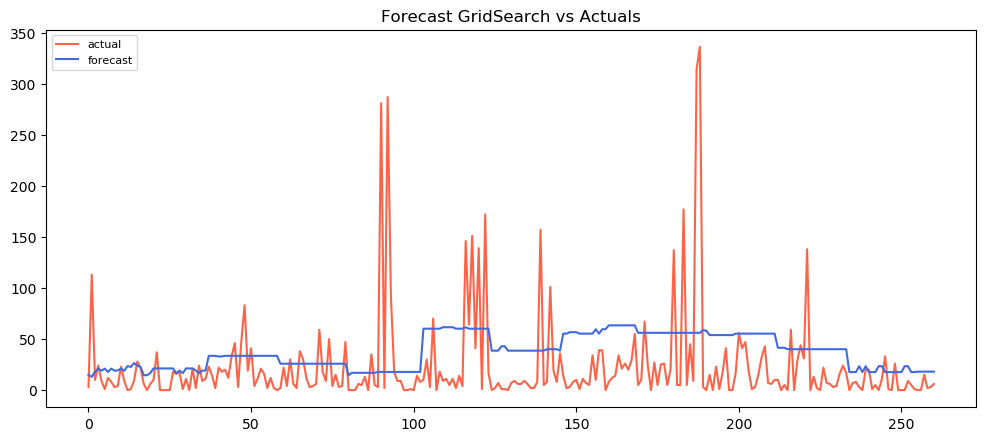

In [31]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [32]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 13.978026913326321,
 'mae': 32.34022789959276,
 'mpe': inf,
 'rmse': 48.49022814182064,
 'corr': 0.1546662956748529,
 'minmax': 0.6818542108797739}

In [35]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    mae = np.mean(np.abs(predictions - test_labels))
    #accuracy = 100 - mape
    accuracy = 1 - mae
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

random_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 32.1534 degrees.
Accuracy = -31.15%.


In [36]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [130,132,135,138,140],
    'max_features': [2, 4, 5],
    'min_samples_leaf': [8, 9, 10],
    'min_samples_split': [8,9,10],
    'n_estimators': [8,9,10,11,12,13]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [37]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 4 folds for each of 810 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 2570 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   26.5s finished


{'bootstrap': True,
 'max_depth': 132,
 'max_features': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 8,
 'n_estimators': 8}

In [33]:
GridSearch_model = RandomForestRegressor(n_estimators = 8,min_samples_split=8,min_samples_leaf=10, max_features=2,max_depth=132)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

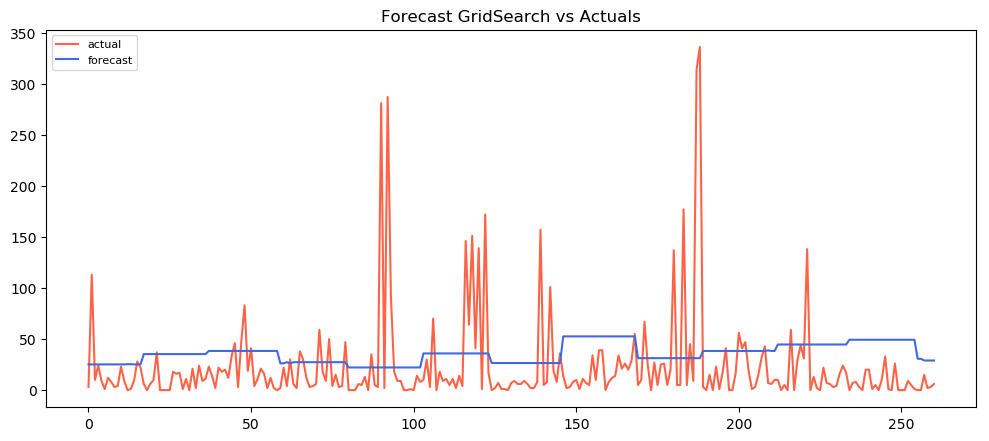

In [34]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 12.50810199943747,
 'mae': 32.69985070250804,
 'mpe': inf,
 'rmse': 49.45702360072483,
 'corr': -0.09685477635160554,
 'minmax': 0.6934640289565508}

In [40]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    mae = np.mean(np.abs(predictions - test_labels))
    #accuracy = 100 - mape
    accuracy = 1 - mae
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

random_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 32.1534 degrees.
Accuracy = -31.15%.
